In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

import econtools
from econtools.documents import Homework, RawLatex
from utils import SREQ, Laffer

filename = "hw03"

doc = Homework(
    title = r"Econ 310 Week 3 Homework",
    due_date = r"Tuesday 9/17"
)


In [2]:
# Basic SREQ question

df = pd.read_csv("SREQ_examples.csv")
params = dict(df.sample(1,random_state=2).reset_index(drop=True).loc[0])
params['Y'] = 50
prob = SREQ(params)

setup = prob.setup()
display(Latex(setup))

questions = fr"""
\begin{{enumerate}}[a.]
\item Write down the consumer's optimization problem.
\item Write down the consumer's first order condition.
\item Write down the firm's optimization problem.
\item Write down the firm's first order condition.
\item Write down the market equilibrium condition.
\item Solve for the equilibrium price and total quantity.
\item Calculate total consumer utility and total firm profit in equilibrium.
\end{{enumerate}}
"""
print(questions)

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
print("\nSolutions:")
print(prob.sol)


<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Write down the consumer's optimization problem.
\item Write down the consumer's first order condition.
\item Write down the firm's optimization problem.
\item Write down the firm's first order condition.
\item Write down the market equilibrium condition.
\item Solve for the equilibrium price and total quantity.
\item Calculate total consumer utility and total firm profit in equilibrium.
\end{enumerate}


Solutions:
{'Q': 150.0, 'p': 26.0, 'qd': 1.0, 'qs': 5.0, 'c': 24.0, 'revenue': 130.0, 'cost': 127.5, 'profit': 2.5, 'total_profit': 75.0, 'utility': 53.0, 'total_utility': 7950.0, 'total_surplus': 8025.0}


In [3]:
# Tax question

df = pd.read_csv("Laffer_examples.csv")
params = dict(df.sample(1,random_state=2).reset_index(drop=True).loc[0])
prob = Laffer(params)

setup = prob.sreq.setup()
display(Latex(setup))

questions = fr"""
\begin{{enumerate}}
\item[a.] Find the equilibrium price and total quantity traded.
\item[b.] Calculate total consumer utility and total firm profit.
\end{{enumerate}}

~ ~

Now suppose an ad valorem tax rate of {prob.params['tp']*100:.0f}\% is levied on producers.

\begin{{enumerate}}
\item[c.] Find the equilibrium price and total quantity under the tax.
\item[d.] Calculate total consumer utility, total firm profit, and tax revenue.
\item[e.] Calculate the deadweight loss caused by the tax.
\end{{enumerate}}

~ ~

Now, instead of using an ad valorem tax, the government decides to raise the same tax revenue using a lump sum tax on producers.

\begin{{enumerate}}
\item[f.] How much lump sum tax must be charged to each producer to raise the same tax revenue as part d?
\item[g.] Calculate total consumer utility, total firm profit, and tax revenue under the lump sum tax. 
\item[h.] Would consumers prefer the ad valorem tax on producers or the lump sum tax on producers?  What about the firms?
\end{{enumerate}}
"""
print(questions)


latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
print("\nSolutions, no tax:")
print(prob.sreq.sol)
print("\nSolutions, tax:")
print(prob.av.sol)

<IPython.core.display.Latex object>


\begin{enumerate}
\item[a.] Find the equilibrium price and total quantity traded.
\item[b.] Calculate total consumer utility and total firm profit.
\end{enumerate}

~ ~

Now suppose an ad valorem tax rate of 25\% is levied on producers.

\begin{enumerate}
\item[c.] Find the equilibrium price and total quantity under the tax.
\item[d.] Calculate total consumer utility, total firm profit, and tax revenue.
\item[e.] Calculate the deadweight loss caused by the tax.
\end{enumerate}

~ ~

Now, instead of using an ad valorem tax, the government decides to raise the same tax revenue using a lump sum tax on producers.

\begin{enumerate}
\item[f.] How much lump sum tax must be charged to each producer to raise the same tax revenue as part d?
\item[g.] Calculate total consumer utility, total firm profit, and tax revenue under the lump sum tax. 
\item[h.] Would consumers prefer the ad valorem tax on producers or the lump sum tax on producers?  What about the firms?
\end{enumerate}


Solutions, no

In [4]:
# Laffer curve

setup = prob.sreq.setup()
display(Latex(setup))

questions = fr"""

An ad valorem tax of $t$ is levied on producers.

\begin{{enumerate}}[a.]
\item Prove that the equilibrium price is equal to: 
{prob.formula_p()}
\item Prove that the equilibrium quantity is equal to: 
{prob.formula_q()}
\item Use Excel or any other software to plot tax revenue as $t$ goes from 0\% to 100\%. How would you describe the shape of this curve? At approximately what tax rate is the tax revenue maximized? This pattern is known as the Laffer Curve.
\end{{enumerate}}
"""
print(questions)


latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))


<IPython.core.display.Latex object>



An ad valorem tax of $t$ is levied on producers.

\begin{enumerate}[a.]
\item Prove that the equilibrium price is equal to: 
$$ p = \frac{ 14 }{ 2 - t } $$
\item Prove that the equilibrium quantity is equal to: 
$$ Q = 1,680 \left( \frac{ 1-t }{ 2 - t } \right) $$
\item Use Excel or any other software to plot tax revenue as $t$ goes from 0\% to 100\%. How would you describe the shape of this curve? At approximately what tax rate is the tax revenue maximized? This pattern is known as the Laffer Curve.
\end{enumerate}



In [5]:
doc.print_pdf(filename, "tex")

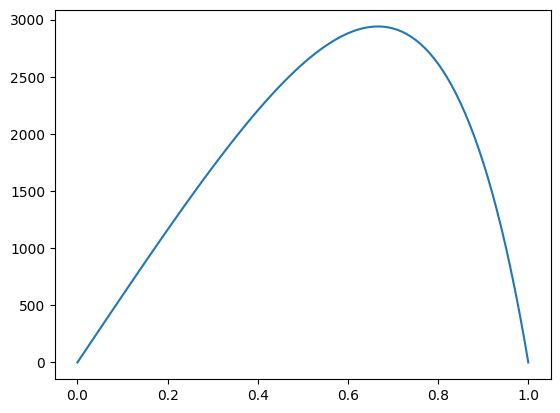

In [6]:
t = np.arange(0,1.01,0.01)
p = 14/(2-t)
Q = 1680*(1-t)/(2-t)
R = t*p*Q
plt.plot(t, R)